In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cost_prediction = pd.read_csv('C:/Users/sunit/Documents/insurance.csv', index_col=0)
cost_prediction = cost_prediction.reset_index()

cost_prediction

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
cost_prediction.shape

(1338, 7)

In [4]:
cost_prediction.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
cost_prediction.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
gender_col = cost_prediction['sex']
genderdummies = pd.get_dummies(gender_col)

In [7]:
genderdummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [8]:
smoker_col = cost_prediction['smoker']
smokerdummies = pd.get_dummies(smoker_col)

In [9]:
smokerdummies.head()
smokerdummies.rename(columns={"no": "non_smoker", "yes": "smoker"})

,non_smoker,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [10]:
region_col = cost_prediction['region']
regiondummies = pd.get_dummies(region_col)

In [11]:
regiondummies.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [12]:
concatenated_cols = pd.concat([genderdummies, smokerdummies, regiondummies], axis=1)
concatenated_cols

,female,male,no,yes,northeast,northwest,southeast,southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [13]:
cost_prediction = pd.concat([cost_prediction, concatenated_cols], axis=1)
cost_prediction

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [14]:
cost_prediction = cost_prediction.drop(['sex', 'smoker' , 'region'], axis=1)
cost_prediction

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [15]:
cost_prediction.shape

(1338, 12)

In [16]:
cost_prediction_corelation = cost_prediction.corr()
cost_prediction_corelation

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


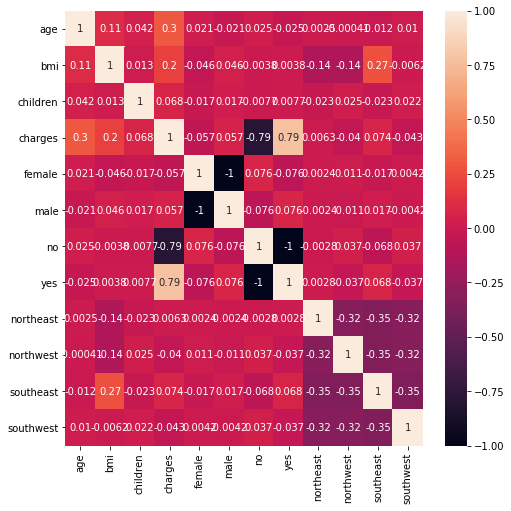

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(cost_prediction_corelation, annot=True)

In [18]:
X = cost_prediction.drop('charges', axis=1)
Y = cost_prediction['charges']

In [19]:
X.shape

(1338, 11)

In [20]:
Y.shape

(1338,)

In [21]:
# create a copy pf dataframe from original data so as to not lose original data
X_cpy = X.copy(deep=True)
X_cpy.columns

Index(['age', 'bmi', 'children', 'female', 'male', 'no', 'yes', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [24]:
# import scaler from scikit
#from sklearn.preprocessing import StandardScaler

# create an instance before being able to call fit_transform method
#sc = StandardScaler()

# apply fit_transform -> fit first, transform next -> avoids two calls
#X_cpy[X_cpy.columns] = sc.fit_transform(X[X.columns])
#X_cpy.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


In [ ]:
#Since the mean and standard-deviations of the numeric features were very different. 
#so we'll apply standard deviation to center all of these numeric features around the mean and express them in terms of 
#standard deviation or z-scores.

from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()

In [ ]:
features_scaled = standard_scaler.fit_transform(X_cpy)

features_scaled.shape

In [ ]:
features_scaled_df = pd.DataFrame(features_scaled, columns= X_cpy.columns)

features_scaled_df.head()

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=0 )

In [26]:
x_train.shape, y_train.shape

((936, 11), (936,))

In [27]:
x_test.shape, y_test.shape

((402, 11), (402,))

In [28]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     314.8
Date:                Thu, 23 Apr 2020   Prob (F-statistic):          3.47e-258
Time:                        10:24:27   Log-Likelihood:                -9495.3
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -324.4943    515.992     -0.629      0.5

In [29]:
#setting normalize= true will center our x data around 0 as a mean. 
#so it'll subtract the mean from all of our x-predictor values and divide by the L2 norm.
#fit will start training our liner regression model.



linear_reg = LinearRegression(normalize= True).fit(x_train, y_train)
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [30]:
print("Training Score : ", linear_reg.score(x_train, y_train))

Training Score :  0.7309562134423534


In [31]:
#now that we have fully trained machine learning model, we can use it for prediction on the test data.

y_pred= linear_reg.predict(x_test)

In [32]:
#The R-squared on the test data is close to the train data and hence it is good model.


from sklearn.metrics import r2_score

print("Testing_score : ",r2_score(y_test, y_pred) )

Testing_score :  0.7909212814869842


In [33]:
#since the scikitlearn doesn't have formula for adjusted R-square, it is calculated manually.

def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1-r_square) * (len(labels)-1))/  (len(labels)- features.shape[1])
    return adj_r_square

In [34]:
print(" Adjusted R2 SCORE : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

 Adjusted R2 SCORE :  0.7855739996835822


<Figure size 576x576 with 0 Axes>

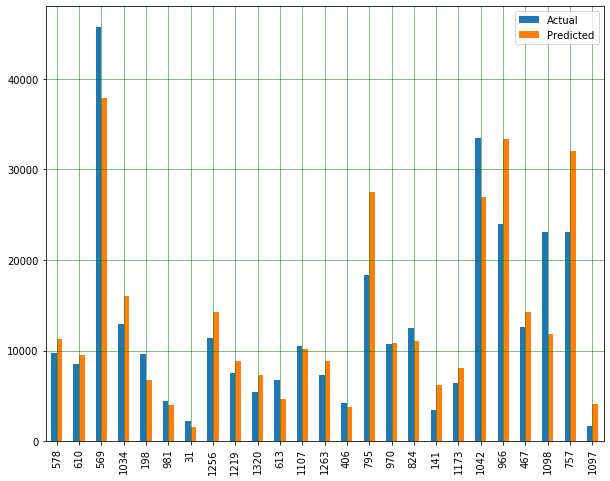

<Figure size 432x288 with 0 Axes>

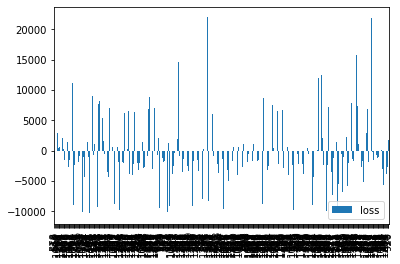

In [35]:
plt.figure(figsize=(8,8))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


plt.figure()
loss_df  = pd.DataFrame({'loss': (y_test - y_pred)})
loss_df.plot(kind = 'bar')
plt.show()